# <b>PRCP-1012
# <b>GAME WINNER PREDICTION

## <B>CONTRIBUTION 
    SIDDHESHWAR KOLI

# <b>BUSINESS PROBLEM

## <b>PROBLEM CONTEXT
<b>
    
- BASED ON GIVEN FEATURE AND MESUREMENT PREDICT THE WIN PROBABILITY OF PUBG MATCH

## <b>REGRESSION TASK

# <b>TASK 1
#### <b>PREPARE A COMPLETE DATA ANALYSIS REPORT ON THE GIVEN DATA.

# <b>TASK 2
#### <b>CREATE A PREDICTIVE MODEL WHICH IS AN ATTEMPT TO PREDICT THE WIN PROBABILITY OF THE PUBG MATCH AND TO LOOK AT THE IMPORTANT FACTORS AFFECTING THE WIN PROBABILITY OF THE PUBG GAME.

## <b>FEATURES:
<b>

### Data Descritption

- DBNOs
- assists
- boosts 
- damageDealt 
- headshotKills 
- heals 
- Id 
- killPlace 
- killPoints
- killStreaks 
- kills 
- longestKill 
- matchDuration  
- matchId  
- matchType 
- rankPoints  
- revives  
- rideDistance  
- roadKills

### <b>TYPES OF MACHINE LEARNING PROBLEM.
- <b>Regression is a supervised learning technique where the goal is to predict a continuous numerical value for each data point, based on labeled training data consisting of input features and their corresponding real-valued outputs.<br>
### <b>ALGORITHM USES FOR REGRESSION
<b>
    
- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor
- XGBoost
- Gradient Boosting Regressor

## <b>DOMAIN ANALYSIS
<b>
TARGET COLUMN == winPlacePerc</b><br>

## <b>Features:

- <b>DBNOs</b><br>
Number of enemy players knocked.
- <b>assists</b><br>Number of enemy players this player damaged that were killed by teammates.
- <b>boosts</b><br>Number of boost items used.
- <b>damageDealt</b><br>Total damage dealt. Note: Self inflicted damage is subtracted.
- <b>headshotKills</b><br>Number of enemy players killed with headshots.
- <b>heals</b><br>Number of healing items used.
- <b>Id</b><br>Player’s Id
- <b>killPlace </b><br> Ranking in match of number of enemy players killed.
- <b>killPoints </b><br> Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in - - rankPoints, then any 0 in killPoints should be treated as a “None”.
- <b>killStreaks </b><br> Max number of enemy players killed in a short amount of time.
- <b>kills </b><br> Number of enemy players killed.
- <b>longestKill </b><br> Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may - -lead to a large longestKill stat.
- <b>matchDuration </b><br> Duration of match in seconds.
- <b>matchId </b><br> ID to identify match. There are no matches that are in both the training and testing set.
- <b>matchType </b><br> String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
- <b>rankPoints </b><br> Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
- <b>revives </b><br> Number of times this player revived teammates.
- <b>rideDistance </b><br> Total distance traveled in vehicles measured in meters.
- <b>roadKills </b><br> Number of kills while in a vehicle.

# <b>TASK 1
#### <b>PREPARE A COMPLETE DATA ANALYSIS REPORT ON THE GIVEN DATA.

##  <b>IMPORTING LIBRARIES AND LOAD DATA

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.rcParams['figure.figsize']=(16,6)
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('pubg.csv')

In [3]:
# For displaying all feature from dataset:
pd.set_option('display.max_columns', None)

## <b>BASIC CHECKS

In [4]:
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,squad-fpp,29,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,solo,93,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,squad-fpp,28,28,1500,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,squad-fpp,26,25,1418,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [5]:
# Top 5 Records
df.head(4)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.0,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.8,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.0,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.0,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.0,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.8,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.0,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.7,3,0,0.1667


In [6]:
# Bottom 5 Records
df.tail(4)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,solo,93,93,1501,0,0.0,0,0.000,0,0,81.7,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,squad-fpp,28,28,1500,0,0.0,0,2.184,0,0,788.7,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,squad-fpp,26,25,1418,2,0.0,0,0.000,0,0,2748.0,8,0,0.8000
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00,0,0,1,18,0,2,1,78.25,1766,solo-fpp,98,94,1590,0,1369.0,0,0.000,0,0,1244.0,5,0,0.5464


In [7]:
# Check shape of dataset
df.shape

(4446966, 29)

<b>In data their are 4446966 observation and 29 feature.

In [8]:
# Check column list
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

* <b>Dataset contain all type of data

In [10]:
df.index

RangeIndex(start=0, stop=4446966, step=1)

In [11]:
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,2.299759e+01,1.579506e+03,4.450467e+01,4.300759e+01,8.920105e+02,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,5.097262e+01,2.587399e+02,2.382811e+01,2.328949e+01,7.366478e+02,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.367000e+03,2.800000e+01,2.700000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.438000e+03,3.000000e+01,3.000000e+01,1.443000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,2.132000e+01,1.851000e+03,4.900000e+01,4.700000e+01,1.500000e+03,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,1.094000e+03,2.237000e+03,1.000000e+02,1.000000e+02,5.910000e+03,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [12]:
df.describe(include='all')

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4446966,4446966,4446966,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4446966,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
unique,4446966,2026745,47965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,7f96b2f878858a,14d6b54cdec6bc,4b5db40aec4797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,squad-fpp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,74,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1756186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,2.299759e+01,1.579506e+03,NaN,4.450467e+01,4.300759e+01,8.920105e+02,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,NaN,NaN,NaN,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,5.097262e+01,2.587399e+02,NaN,2.382811e+01,2.328949e+01,7.366478e+02,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,NaN,1.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.367000e+03,NaN,2.800000e+01,2.700000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,NaN,NaN,NaN,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.438000e+03,NaN,3.000000e+01,3.000000e+01,1.443000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,NaN,NaN,NaN,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,2.132000e+01,1.851000e+03,NaN,4.900000e+01,4.700000e+01,1.500000e+03,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01


### <b>Exploratory Data Analysis (EDA)

<b>UNIVARIATE ANALYSIS

In [13]:
import sweetviz as sv
#report = sv.analyze(df)
#report.show_html('sweetviz_report.html')

<B>Insights

    - Univariate analysis focuses on analyzing one variable at a time to understand its distribution, central tendency, variability, and shape. Here are some insights that can be gained through univariate analysis:

- <B>Central Tendency:
    - Mean, median, and mode: Univariate analysis helps in calculating these measures to understand the central value around which the data is distributed.
    - Understanding the central tendency provides insights into the typical or average value of the variable. Variability:

- <B>Range: 
    - Univariate analysis helps in calculating the range of the variable, which indicates the spread of values from the minimum to the maximum.
    - Standard deviation and variance: These measures quantify the dispersion or variability of the data points around the central tendency.
    - Understanding variability is crucial for assessing the consistency or volatility of the variable.

- <B>Distribution:
    - Histogram: Univariate analysis often involves creating histograms to visualize the distribution of the variable.
    - Skewness and kurtosis: These measures provide insights into the symmetry and shape of the distribution.
    - Understanding the distribution helps in identifying patterns, outliers, and potential data issues. Frequency Analysis:

- <B>Count or frequency: 
    - Univariate analysis helps in counting the occurrences of different values or categories within the variable.
    - Mode: Identifying the mode helps in understanding the most frequent value or category within the variable, Frequency analysis provides insights into the prevalence or occurrence of different values or categories and Summary Statistics:

- <B>Quartiles and percentiles: 
    - Univariate analysis helps in calculating these statistics to understand the spread of data across different percentiles, Summary statistics provide a concise summary of the variable's characteristics, facilitating easy comparison and interpretation and Outliers Detection.

- <B>Box plots:
    - Univariate analysis involves creating box plots to visualize the distribution of the variable and identify potential outliers, Understanding outliers is important as they may indicate errors in data collection or interesting phenomena worthy of further investigation and Distributions of Categorical Variables.ysis
 
- <B>Bar charts: 
    - Univariate analysis of categorical variables often involves creating bar charts to visualize the frequency distribution of different categories.
    - Understanding the distribution of categorical variables helps in identifying dominant categories and assessing their impact on the analysis and By conducting univariate analysis, analysts can gain valuable insights into individual variables, which serve as the foundation for more advanced multivariate analysis and modeling techniques.

<b>BIVARIATE ANALYSIS

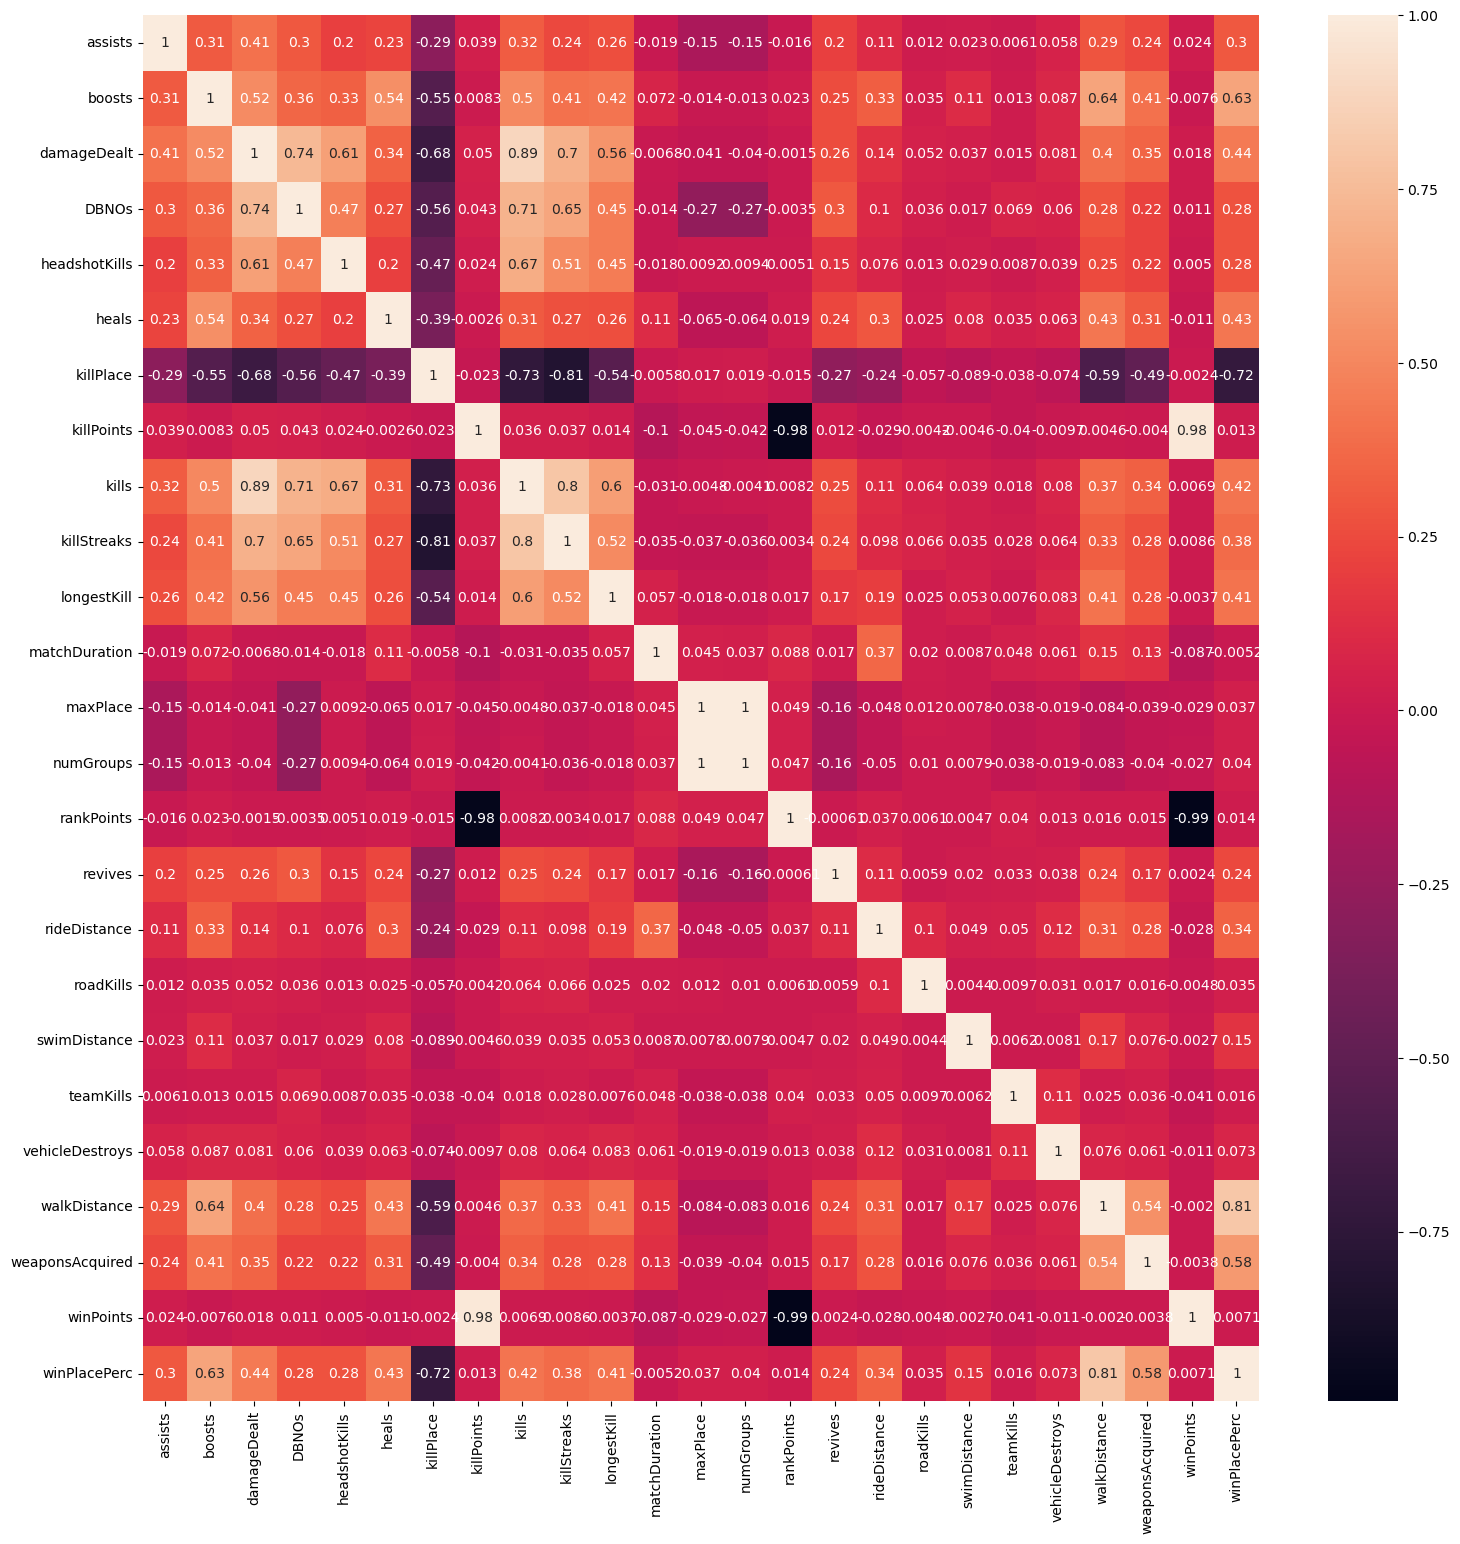

In [14]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=[18,18])
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

<B>Insights
    
    - Bivariate analysis involves analyzing the relationship between two variables to understand how they are related to each other. Here are some insights gained through bivariate analysis:

- <B>Correlation Analysis:
    - Pearson correlation coefficient: Bivariate analysis helps in calculating the strength and direction of the linear relationship between two continuous variables and Understanding correlation helps in identifying variables that are positively or negatively associated with each other.

- <B>Heatmaps: 
    - Bivariate analysis includes creating heatmaps to visualize the correlation matrix between multiple variables. Heatmaps provide a comprehensive view of the relationships between variables and help in identifying clusters or groups of highly correlated variables. By conducting bivariate analysis, analysts can gain deeper insights into the relationships between variables, which is crucial for understanding patterns, making predictions, and informing decision-making processes.

### <B>DATA PREPROCESSING

In [15]:
# Check for duplicate data
df.duplicated().sum()

0

In [16]:
# Check for null value in data
df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [17]:
# check row with null value win place perc
df[df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,0,0,0,0.0,9,solo-fpp,1,1,1574,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [18]:
# remove that row 
df.drop(2744604, inplace = True)

In [19]:
df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

<B>CHECK PLAYER DISTRIBUTION

In [20]:
df['playerjoined']=df.groupby('matchId')['matchId'].transform('count')

In [21]:
df.head(4)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerjoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.0,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.8,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.0,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.0,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.0,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.8,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.0,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.7,3,0,0.1667,91


<B>KILL WITHOUT MOVING

In [22]:
# prepare a data parameter to check for anamoly detection that
df['totaldistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']

In [23]:
# the person has not moved but still managed to do the kills
df['killwithoutmoving']=((df['kills']>0) & (df['totaldistance']==0))

<b>players who travel zero distance yet they have killed enemies seems suspicious, hence removing those rows.

In [24]:
df[df['killwithoutmoving']==True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerjoined,totaldistance,killwithoutmoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,0,6,3,23.540,593,normal-squad-fpp,15,13,1500,0,0.0,0,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,0,3,1,6.523,1794,normal-squad-fpp,11,11,1500,0,0.0,0,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,0,20,6,37.080,898,normal-solo-fpp,20,15,1500,0,0.0,0,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,1000,1,1,21.540,799,normal-squad-fpp,19,18,-1,0,0.0,0,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,0,1,1,55.430,1794,normal-squad-fpp,11,11,1500,0,0.0,0,0.0,0,0,0.0,10,0,0.3000,42,0.0,True


In [25]:
df[df['killwithoutmoving']==True].shape

(1535, 32)

In [26]:
df.drop(df[df['killwithoutmoving']==True].index , inplace=True)

In [27]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playerjoined',
       'totaldistance', 'killwithoutmoving'],
      dtype='object')

In [28]:
# ExtraOrdinary Road kills
df[df['roadKills']>=5].shape

(82, 32)

<B>INSIGHT
- In a match a player cannot not kill more that 20 kill

In [29]:
df[df['kills']>20].shape

(417, 32)

In [30]:
df.drop(df[df['kills']>20].index, inplace = True)

<b>HEADSHOT

In [31]:
df['headshot_rate']=df['headshotKills']/df['kills']

In [32]:
df['headshot_rate']=df['headshot_rate'].fillna(0)

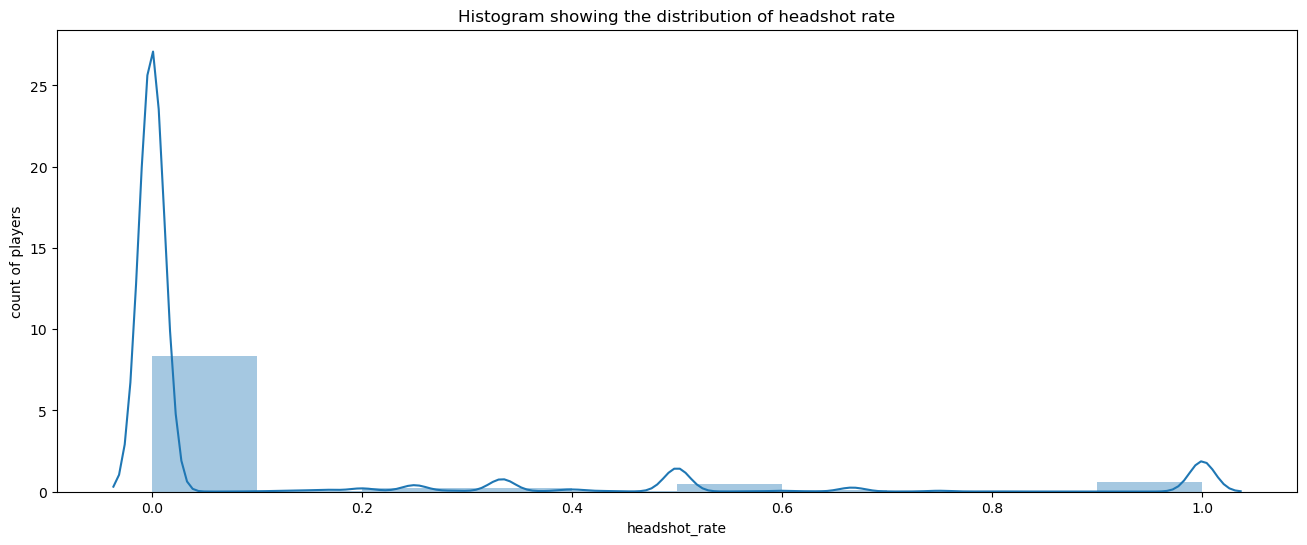

In [33]:
# Plot the headshot rate distribution
sns.distplot(df['headshot_rate'],bins=10).set_title('Histogram showing the distribution of headshot rate')
plt.ylabel('count of players')
plt.show()

In [34]:
df[(df['headshot_rate'] ==1) & (df['kills']>5)].shape

(187, 33)

In [35]:
df.drop(df[(df['headshot_rate']==1)& (df['kills']>6)].index,inplace=True)

<b>LONGEST SHOT

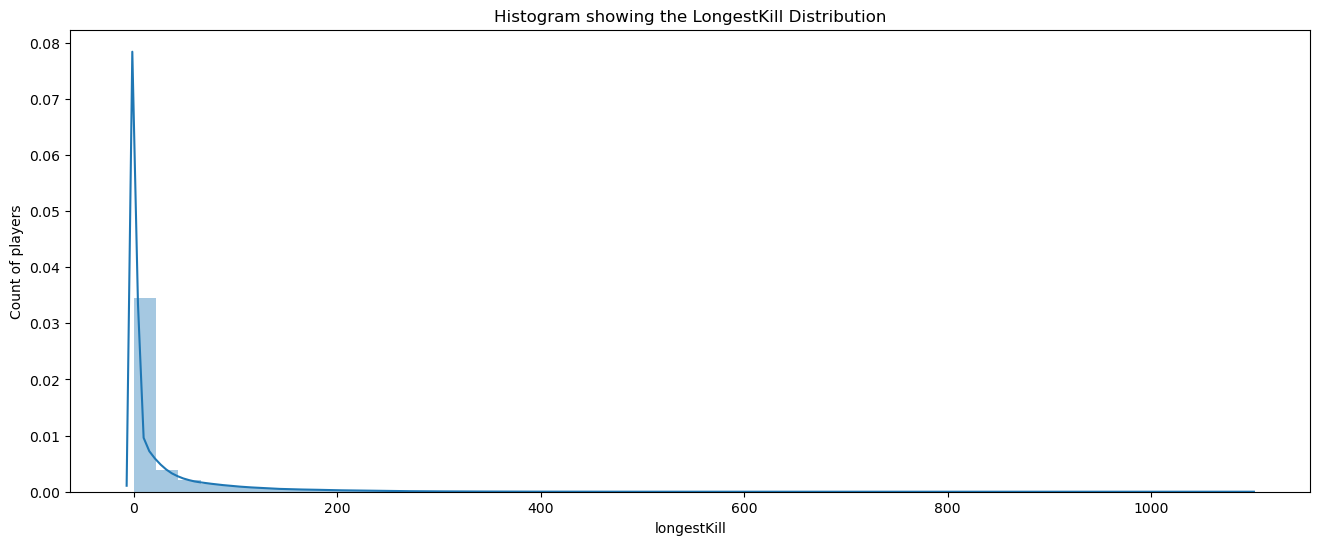

In [36]:
sns.distplot(df['longestKill'],bins=50).set_title('Histogram showing the LongestKill Distribution')
plt.ylabel('Count of players')
plt.show()

<B>OBSERVATION
- If a player can kill more than 500m distance it seem suspisious player so we remove those player.

In [37]:
df[df['longestKill']>=500].shape

(1747, 33)

In [38]:
df.drop(df[df['longestKill']>=500].index, inplace = True)

<b>WEAPON CHANGE

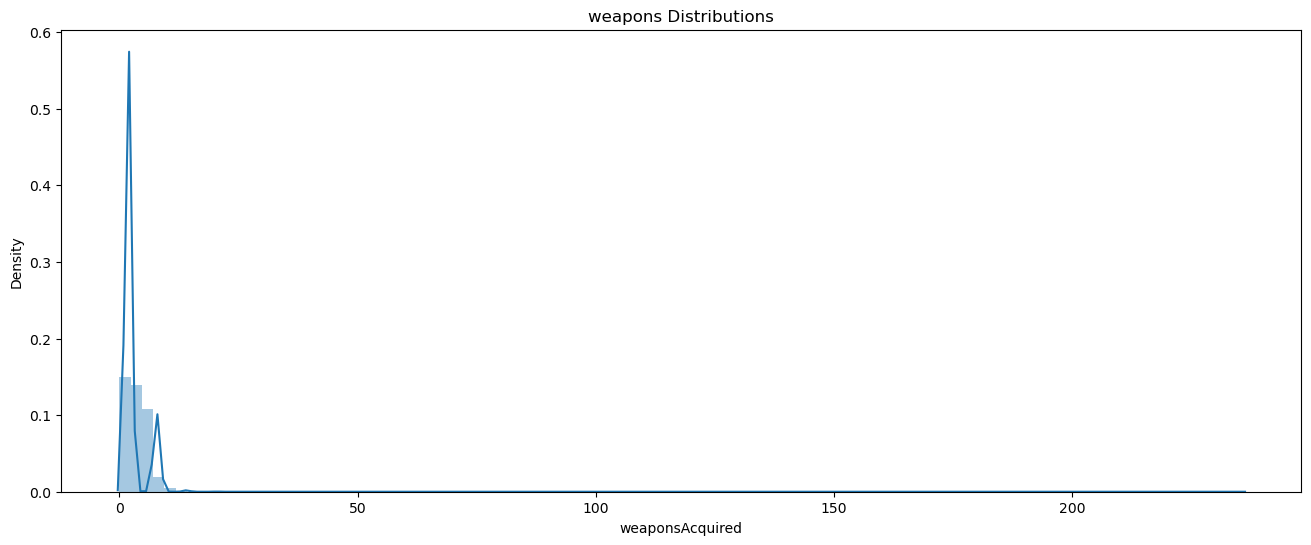

In [39]:
sns.distplot(df['weaponsAcquired'],bins=100).set_title('weapons Distributions')
plt.show()

In [40]:
df[df['weaponsAcquired']>=15].shape

(6809, 33)

In [41]:
df.drop(df[df['weaponsAcquired']>=15].index,inplace=True)

In [42]:
df.head(4)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerjoined,totaldistance,killwithoutmoving,headshot_rate
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.0,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.8,1,1466,0.4444,96,244.8000,False,0.0
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.0,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.0,5,0,0.6400,91,1445.0445,False,0.0
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.0,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.8,2,0,0.7755,98,161.8000,False,0.0
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.0,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.7,3,0,0.1667,91,202.7000,False,0.0


In [43]:
df['weaponsAcquired'].unique()

array([ 1,  5,  2,  3,  6,  4,  9,  7,  0,  8, 11, 10, 13, 14, 12],
      dtype=int64)

In [44]:
df[df['weaponsAcquired']>=15]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerjoined,totaldistance,killwithoutmoving,headshot_rate


### <b>FEATURE ENGINEERING

In [45]:
normalising_factor=(100-df['playerjoined']/100)+1

In [46]:
df['killsNorm']=df['kills']* normalising_factor

df['damageDealtNorm']=df['damageDealt']* normalising_factor

df['maxPlaceNorm']=df['maxPlace']* normalising_factor

df['matchDurationNorm']=df['matchDuration']* normalising_factor

df['traveldistance']=df['walkdistance']=df['swimDistance']+df['rideDistance']

df['healsnboosts']=df['heals']+df['boosts']

df['assist']=df['assists']+df['revives']

In [47]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playerjoined',
       'totaldistance', 'killwithoutmoving', 'headshot_rate', 'killsNorm',
       'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'walkdistance', 'healsnboosts', 'assist'],
      dtype='object')

In [48]:
data = df.drop(columns = ['Id', 'groupId', 'matchId', 'assists', 'boosts', 'walkDistance', 'swimDistance', 
                          'rideDistance', 'heals', 'revives', 'kills', 'damageDealt', 'maxPlace', 'matchDuration','killwithoutmoving'])

In [49]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,teamKills,vehicleDestroys,weaponsAcquired,winPoints,winPlacePerc,playerjoined,totaldistance,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,walkdistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,0,0,1,1466,0.4444,96,244.8000,0.0,0.00,0.0000,2801.12,130652.24,0.0000,0.0000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,0,0,5,0,0.6400,91,1445.0445,0.0,0.00,9155.2323,2602.34,177859.93,11.0445,11.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,0,0,2,0,0.7755,98,161.8000,0.0,0.00,6801.3600,5001.00,131826.36,0.0000,0.0000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,0,0,3,0,0.1667,91,202.7000,0.0,0.00,3292.9610,3102.79,143729.24,0.0000,0.0000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,0,0,2,0,0.1875,97,49.7500,0.0,100.03,10003.0000,9702.91,142442.72,0.0000,0.0000,0,0


In [50]:
data.shape

(4436352, 26)

### <b>ENCODING

In [51]:
data.columns

Index(['DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'matchType', 'numGroups', 'rankPoints', 'roadKills',
       'teamKills', 'vehicleDestroys', 'weaponsAcquired', 'winPoints',
       'winPlacePerc', 'playerjoined', 'totaldistance', 'headshot_rate',
       'killsNorm', 'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'walkdistance', 'healsnboosts', 'assist'],
      dtype='object')

In [52]:
data.matchType.unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-squad', 'crashtpp',
       'normal-solo', 'normal-duo'], dtype=object)

In [53]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

In [54]:
data.matchType=lc.fit_transform(data.matchType)

In [55]:
data.head(4)

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,teamKills,vehicleDestroys,weaponsAcquired,winPoints,winPlacePerc,playerjoined,totaldistance,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,walkdistance,healsnboosts,assist
0,0,0,60,1241,0,0.0,15,26,-1,0,0,0,1,1466,0.4444,96,244.8000,0.0,0.0,0.0000,2801.12,130652.24,0.0000,0.0000,0,0
1,0,0,57,0,0,0.0,15,25,1484,0,0,0,5,0,0.6400,91,1445.0445,0.0,0.0,9155.2323,2602.34,177859.93,11.0445,11.0445,0,0
2,0,0,47,0,0,0.0,2,47,1491,0,0,0,2,0,0.7755,98,161.8000,0.0,0.0,6801.3600,5001.00,131826.36,0.0000,0.0000,0,1
3,0,0,75,0,0,0.0,15,30,1408,0,0,0,3,0,0.1667,91,202.7000,0.0,0.0,3292.9610,3102.79,143729.24,0.0000,0.0000,0,0


In [56]:
data.shape

(4436352, 26)

### <b>OUTLIER HANDLING

Skipping column 'matchType' as it is non-numeric.


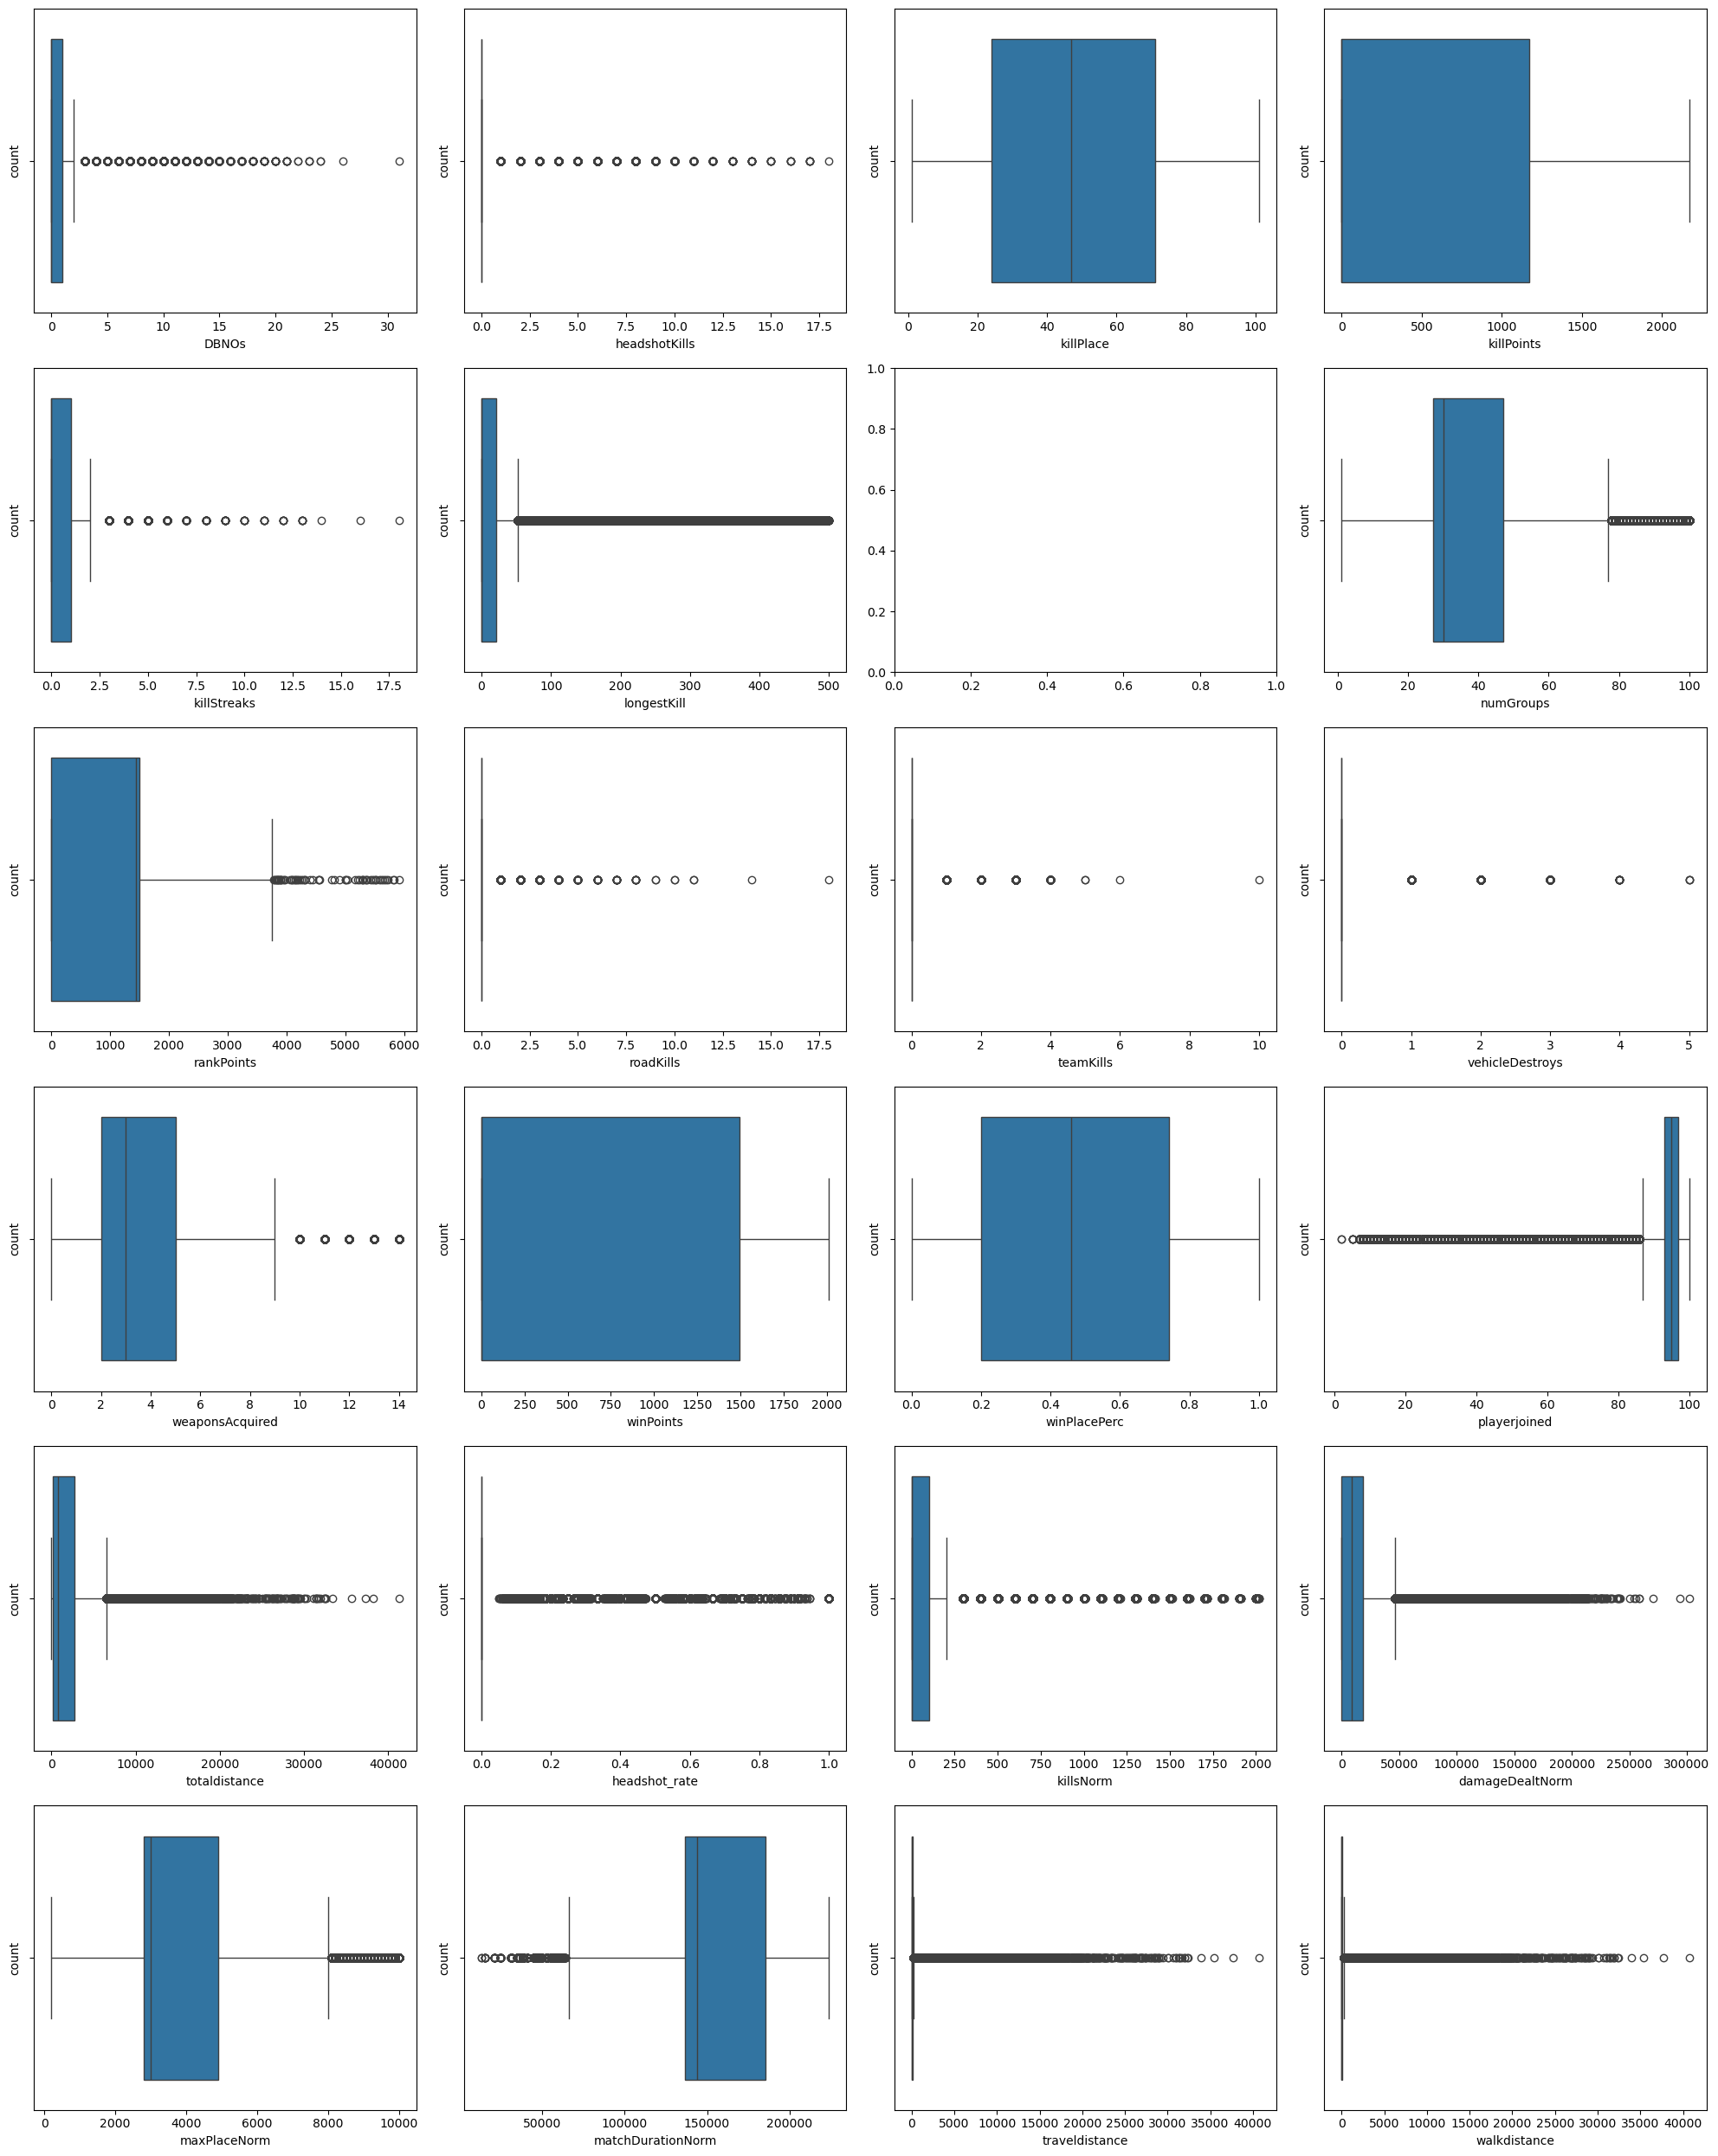

In [57]:
plt.figure(figsize=(20, 25))
plotnumber = 1

for column in data.columns:
    if plotnumber <= 24:
        ax = plt.subplot(6, 4, plotnumber)
        if data[column].dtype in ['int64', 'float64']: 
            sns.boxplot(x=data[column])
            plt.xlabel(column)
            plt.ylabel('count')
        else:
            print(f"Skipping column '{column}' as it is non-numeric.")
    plotnumber += 1
plt.tight_layout()
plt.show()

In [58]:
from scipy import stats
col = 1
for c in data:  
    if col <= 25:
        IQR = stats.iqr(data[c], interpolation='midpoint')
        print(c, 'IQR:', IQR)
        Q1 = data[c].quantile(0.25)
        Q3 = data[c].quantile(0.75)
        min_limit = Q1 - 1.5 * IQR
        print(c, 'min_limit:', min_limit)
        max_limit = Q3 + 1.5 * IQR
        print(c, 'max_limit:', max_limit, '\n')

        data.loc[(data[c] < min_limit) | (data[c] > max_limit), c] = np.median(data[c])

        replaced_outliers = data.loc[(data[c] < min_limit) | (data[c] > max_limit), c]
        print(f"Replaced outliers in {c}:", replaced_outliers, '\n')

DBNOs IQR: 1.0
DBNOs min_limit: -1.5
DBNOs max_limit: 2.5 

Replaced outliers in DBNOs: Series([], Name: DBNOs, dtype: int64) 

headshotKills IQR: 0.0
headshotKills min_limit: 0.0
headshotKills max_limit: 0.0 

Replaced outliers in headshotKills: Series([], Name: headshotKills, dtype: int64) 

killPlace IQR: 47.0
killPlace min_limit: -46.5
killPlace max_limit: 141.5 

Replaced outliers in killPlace: Series([], Name: killPlace, dtype: int64) 

killPoints IQR: 1172.0
killPoints min_limit: -1758.0
killPoints max_limit: 2930.0 

Replaced outliers in killPoints: Series([], Name: killPoints, dtype: int64) 

killStreaks IQR: 1.0
killStreaks min_limit: -1.5
killStreaks max_limit: 2.5 

Replaced outliers in killStreaks: Series([], Name: killStreaks, dtype: int64) 

longestKill IQR: 21.12
longestKill min_limit: -31.68
longestKill max_limit: 52.8 

Replaced outliers in longestKill: Series([], Name: longestKill, dtype: float64) 

matchType IQR: 12.0
matchType min_limit: -15.0
matchType max_limit: 

In [59]:
x=data.drop(['winPlacePerc'],axis=1)
y=data['winPlacePerc']

In [60]:
features=x.columns

### <b>DATA SCALING

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [62]:
x =scaler.fit_transform(x)

In [63]:
data.columns

Index(['DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'matchType', 'numGroups', 'rankPoints', 'roadKills',
       'teamKills', 'vehicleDestroys', 'weaponsAcquired', 'winPoints',
       'winPlacePerc', 'playerjoined', 'totaldistance', 'headshot_rate',
       'killsNorm', 'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'walkdistance', 'healsnboosts', 'assist'],
      dtype='object')

In [64]:
x

array([[-0.61783557,  0.        ,  0.44935828, ..., -0.1770916 ,
        -0.6993869 , -0.50407269],
       [-0.61783557,  0.        ,  0.34006932, ...,  0.23258464,
        -0.6993869 , -0.50407269],
       [-0.61783557,  0.        , -0.02422721, ..., -0.1770916 ,
        -0.6993869 ,  1.26776395],
       ...,
       [-0.61783557,  0.        ,  0.6679362 , ..., -0.09607997,
        -0.6993869 , -0.50407269],
       [ 0.92936099,  0.        , -1.33569473, ..., -0.1770916 ,
         1.63213535,  3.03960059],
       [-0.61783557,  0.        , -1.08068716, ..., -0.1770916 ,
         0.46637423, -0.50407269]])

In [65]:
y

0          0.4444
1          0.6400
2          0.7755
3          0.1667
4          0.1875
            ...  
4446961    0.1786
4446962    0.2935
4446963    0.4815
4446964    0.8000
4446965    0.5464
Name: winPlacePerc, Length: 4436352, dtype: float64

### <b>DATA SPLITING

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size = 0.3, random_state = 20)

In [67]:
print(X_train.shape, y_train.shape)

(3105446, 25) (3105446,)


In [68]:
print(X_test.shape, y_test.shape)

(1330906, 25) (1330906,)


In [69]:
X_train

array([[ 2.47655754,  0.        , -1.40855403, ..., -0.1770916 ,
         1.24354831,  1.26776395],
       [ 0.92936099,  0.        , -0.38852375, ..., -0.1770916 ,
         2.40930944, -0.50407269],
       [-0.61783557,  0.        , -1.69999126, ..., -0.1770916 ,
        -0.31079986,  1.26776395],
       ...,
       [-0.61783557,  0.        ,  1.72439614, ..., -0.1770916 ,
        -0.6993869 , -0.50407269],
       [-0.61783557,  0.        ,  1.50581822, ..., -0.1770916 ,
        -0.6993869 , -0.50407269],
       [ 0.92936099,  0.        , -0.46138305, ..., -0.1770916 ,
        -0.6993869 , -0.50407269]])

# <b>TASK 2
#### <b>CREATE A PREDICTIVE MODEL WHICH IS AN ATTEMPT TO PREDICT THE WIN PROBABILITY OF THE PUBG MATCH AND TO LOOK AT THE IMPORTANT FACTORS AFFECTING THE WIN PROBABILITY OF THE PUBG GAME.

## <B>MODEL TRAINING

### <b>1) LINEAR REGRESSION

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [71]:
LR=LinearRegression()

In [72]:
LR.fit(X_train,y_train)

LinearRegression()

In [73]:
train_pred=LR.predict(X_train)

In [76]:
r2_train=r2_score(y_train,train_pred)

In [77]:
print('R squared value:' ,r2_train)

R squared value: 0.7788167654521081


In [78]:
test_pred=LR.predict(X_test)

In [79]:
r2_test=r2_score(y_test,test_pred)

In [80]:
print('R squred value:',r2_test)

R squred value: 0.7786372057828841


In [81]:
import math
mae_lr = mean_absolute_error(y_test, test_pred)
mse_lr = mean_squared_error(y_test, test_pred)
rmse_lr = math.sqrt(mse_lr)

In [82]:
print(f"Mean Absolute Error (MAE): {mae_lr}")
print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr}")

Mean Absolute Error (MAE): 0.10590670545911467
Mean Squared Error (MSE): 0.020905313857562783
Root Mean Squared Error (RMSE): 0.1445867001406519


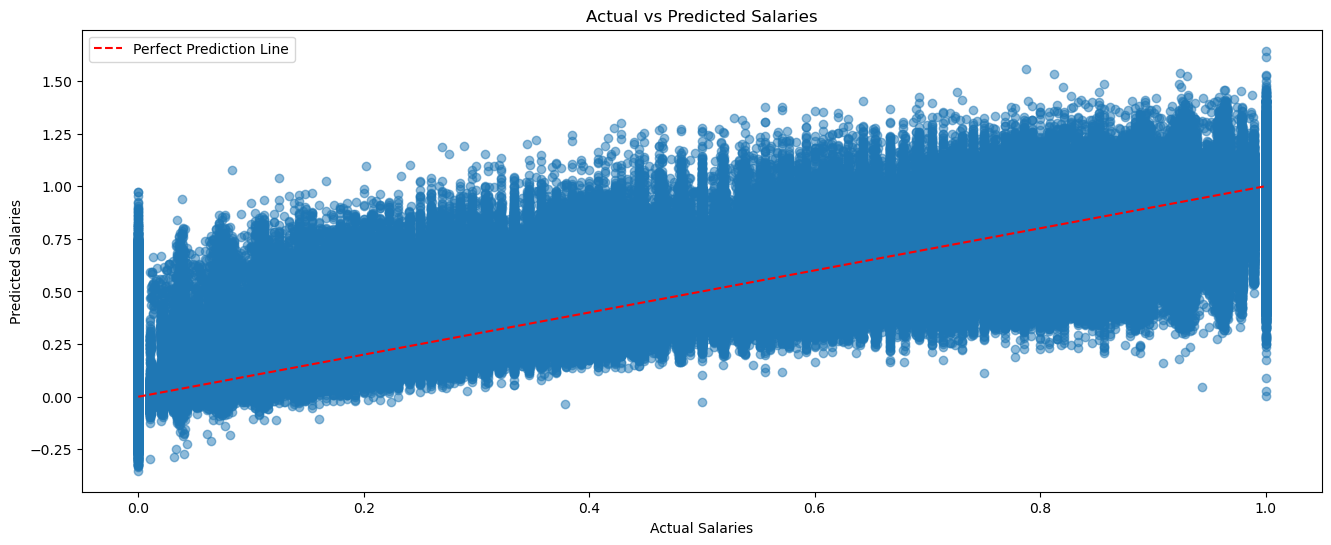

In [83]:
plt.scatter(y_test, test_pred, alpha=0.5)
plt.xlabel("Actual Salaries")
plt.ylabel("Predicted Salaries")
plt.title("Actual vs Predicted Salaries")

# Add a diagonal separator line (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')

# Show the plot
plt.legend()
plt.show()

### <b>2) DECISION TREE REGRESSOR

In [86]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor(random_state=44)

In [87]:
DT.fit(X_train,y_train)

DecisionTreeRegressor(random_state=44)

In [88]:
train_pred_dt=DT.predict(X_train)

In [89]:
r2_train_dt=r2_score(y_train,train_pred_dt)

In [90]:
print('R squared value:' ,r2_train_dt)

R squared value: 0.9999518165231922


In [91]:
test_pred_dt=DT.predict(X_test)

In [92]:
r2_test_dt=r2_score(y_test,test_pred_dt)

In [93]:
print('R squred value:',r2_test_dt)

R squred value: 0.8523078383847749


In [94]:
mae=mean_absolute_error(y_test,test_pred_dt)

In [95]:
mse=mean_squared_error(y_test,test_pred_dt)

In [96]:
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 0.08185462084975699


In [97]:
print(math.sqrt(mean_squared_error(y_test,test_pred_dt)))

0.11810132101086264


In [98]:
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.013947922024510825


#### <b>3) RANDOM FOREST REGRESSOR

In [99]:
from sklearn.ensemble import RandomForestRegressor

In [100]:
RF=RandomForestRegressor(n_estimators=10,random_state=42)

In [101]:
RF.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [102]:
train_pred_RF=RF.predict(X_train)

In [103]:
r2_train_RF=r2_score(y_train,train_pred_RF)

In [104]:
print('R squared value:' ,r2_train_RF)

R squared value: 0.9856854702254004


In [105]:
test_pred_RF=RF.predict(X_test)

In [106]:
r2_test_RF=r2_score(y_test,test_pred_RF)
print('R squred value:',r2_test_RF)

R squred value: 0.9198304067376935


In [107]:
mae=mean_absolute_error(y_test,test_pred_RF)
mse=mean_squared_error(y_test,test_pred_RF)

In [108]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

Mean Absolute Error (MAE): 0.061493335461672245
Mean Squared Error (MSE): 0.007571148145780324


In [109]:
print(math.sqrt(mean_squared_error(y_test,test_pred_RF))) 

0.08701234478957756


### <b>4) XGB REGRESSOR

In [110]:
from xgboost import XGBRegressor
XG=XGBRegressor(random_state=42)

In [112]:
XG.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [113]:
train_pred_XG=XG.predict(X_train)

In [114]:
r2_train_XG=r2_score(y_train,train_pred_XG)
print('R squared value:' ,r2_train_XG)

R squared value: 0.927821997481647


In [115]:
test_pred_XG=XG.predict(X_test)

In [116]:
r2_test_XG=r2_score(y_test,test_pred_XG)
print('R squred value:',r2_test_XG)

R squred value: 0.926360934966329


In [117]:
mae=mean_absolute_error(y_test,test_pred_XG)

In [118]:
mse=mean_squared_error(y_test,test_pred_XG)

In [119]:
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 0.05955511216876028


In [120]:
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.006954410618780211


In [121]:
print(math.sqrt(mean_squared_error(y_test,test_pred_XG)))

0.08339310894060858


### <b>5) GRADIENT BOOSTING

In [122]:
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor(max_depth=4,random_state=42)

In [123]:
GB.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=4, random_state=42)

In [124]:
train_pred_GB=GB.predict(X_train)

In [125]:
r2_train_GB=r2_score(y_train,train_pred_GB)
print('R squared value:' ,r2_train_GB)

R squared value: 0.906351004685318


In [127]:
test_pred_GB=GB.predict(X_test)

In [128]:
r2_test_GB=r2_score(y_test,test_pred_GB)
print('R squred value:',r2_test_GB)

R squred value: 0.9058009709431963


In [129]:
mae=mean_absolute_error(y_test,test_pred_GB)

In [130]:
mse=mean_squared_error(y_test,test_pred_GB)

In [131]:
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 0.0668168822779077


In [132]:
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.008896076120084922


In [133]:
print(math.sqrt(mean_squared_error(y_test,test_pred_GB))) 

0.09431901250588305


## <b>CREATE A DATAFRAME FOR TRAINING AND TESTING MODEL COMPARISON

In [134]:
# Create a DataFrame for model comparison
models_comparison = {
    "Model": ["Linear Regression",
              "Decision Tree Regressor",
              "Random Forest Regressor",
              "XGBoost",
              "Gradient Boosting Regressor"
             ],
    "Train R2 Score": [0.7788167654521081,
                       0.9999518165231922,
                       0.9856854702254004,
                       0.927821997481647,
                       0.906351004685318
                      ],
    "Test R2 Score": [ 0.7786372057828841,
                      0.8523078383847749,
                      0.9198304067376935,
                      0.926360934966329,
                      0.9058009709431963
                     ]
}

# Convert dictionary to a DataFrame
metrics_df = pd.DataFrame(models_comparison)

# Display the table
metrics_df

,Model,Train R2 Score,Test R2 Score
0,Linear Regression,0.778817,0.778637
1,Decision Tree Regressor,0.999952,0.852308
2,Random Forest Regressor,0.985685,0.919830
3,XGBoost,0.927822,0.926361
4,Gradient Boosting Regressor,0.906351,0.905801


### <b>RESULT SUMMARY

<b>1) Linear Regression:</b>

    - Train R²: 0.779
    - Test R²: 0.779
    - The model performs fairly well, showing a good balance between training and testing performance, suggesting no significant overfitting.
<br>
<b>2) Decision Tree Regressor:</b>

    - Train R²: 0.99995
    - Test R²: 0.852
    - The model is highly overfit to the training data (near-perfect performance), but it still generalizes well to the test data, though with a notable drop.
<br>
<b>3) Random Forest Regressor:</b>

    - Train R²: 0.9857
    - Test R²: 0.9198
    - This model shows a very strong performance on both training and testing data, indicating good generalization with a small drop in performance on the test set.
<br>
<b>4) XGBoost:</b>

    - Train R²: 0.9278
    - Test R²: 0.9264
    - The XGBoost model is consistent, with almost no drop between training and test data, indicating it is robust and generalizes well.
<br>
<b>5) Gradient Boosting Regressor:</b>

    - Train R²: 0.9064
    - Test R²: 0.9058
    - Similar to XGBoost, this model shows strong consistency, with a small but acceptable drop in performance between training and test data.
<br>
<b>OBSERVATION</b>
    
- The Decision Tree Regressor shows overfitting, though it still performs decently on test data.
- Random Forest, XGBoost and Gradient Boosting all perform well with strong generalization capabilities.
- XGBoost and Gradient Boosting are quite robust, with little difference between training and test performance.

### <b>MODEL COMPARISION

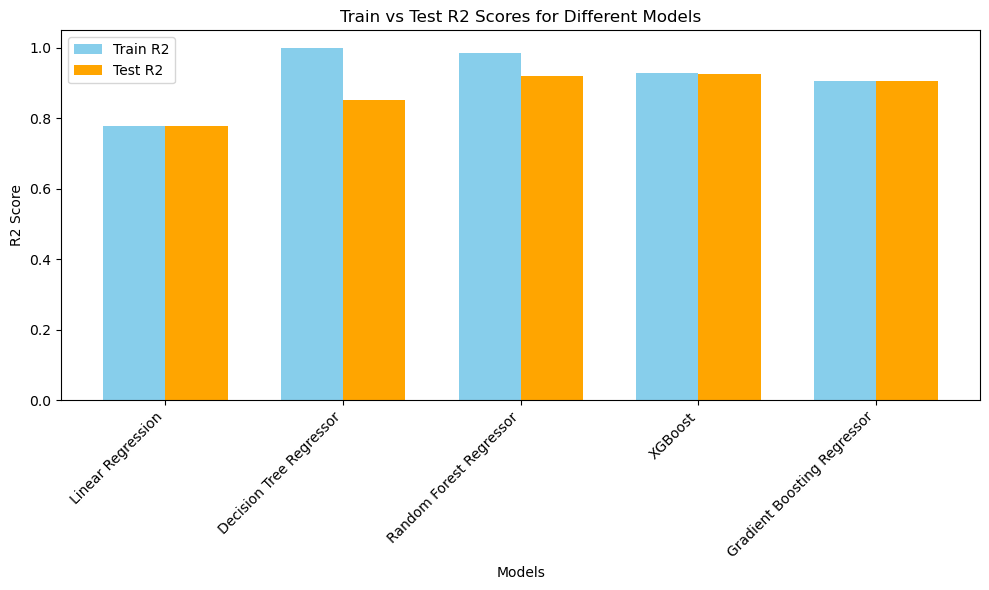

In [137]:
models = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'XGBoost', 'Gradient Boosting Regressor']
train_r2 = [0.778817, 0.999952, 0.985685, 0.927822, 0.906351]
test_r2 = [0.778637, 0.852308, 0.919830, 0.926361, 0.905801]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, train_r2, width, label='Train R2', color='skyblue')
rects2 = ax.bar(x + width/2, test_r2, width, label='Test R2', color='orange')

ax.set_xlabel('Models')
ax.set_ylabel('R2 Score')
ax.set_title('Train vs Test R2 Scores for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

## <b>SAVE MODEL

In [138]:
import pickle
filename = 'Game_Winner_XGB.pkl'
with open(filename, 'wb') as f:
    pickle.dump(XG, f)
print("Model saved successfully!")

Model saved successfully!


## <b>LOAD MODEL

In [140]:
with open(filename, 'rb') as f:
    loaded_model = pickle.load(f)
predictions = loaded_model.predict(X_test)
print(predictions)

[0.06868941 0.7852845  0.32297754 ... 0.48304495 0.62762445 0.23428707]


# <B>THANK YOU

# <b>END OF PROJECT
<b>SIDDHESHWAR KOLI